In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import mplhep as hep
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia (model: gg2A3 inclusive)

`Cross section` computed using the HiGLU generator for a pseudoscalar particle.
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

[-7.00721829e-05  7.60029022e-03 -5.72780410e-03]
Mass points considered: 
 [1.176  1.187  1.199  1.211  1.223  1.235  1.248  1.26   1.273  1.286
 1.299  1.312  1.325  1.338  1.351  1.365  1.378  1.392  1.406  1.42
 1.434  1.449  1.463  1.478  1.493  1.508  1.523  1.538  1.553  1.569
 1.584  1.6    1.616  1.632  1.649  1.665  1.682  1.699  1.716  1.733
 1.75   1.768  1.785  1.803  1.821  1.839  1.858  1.876  1.895  1.914
 1.933  1.953  1.972  1.992  2.012  2.032  2.052  2.073  2.094  2.114
 2.136  2.157  2.179  2.2    2.222  2.245  2.267  2.29   2.313  2.336
 2.359  2.383  2.406  2.43   2.455  2.479  2.504  2.529  2.554  2.58
 2.5801 4.2009 4.201  4.243  4.286  4.328  4.372  4.415  4.46   4.504
 4.549  4.595  4.641  4.687  4.734  4.781  4.829  4.877  4.926  4.975
 5.025  5.075  5.126  5.177  5.229  5.282  5.334  5.388  5.442  5.496
 5.551  5.606  5.663  5.719  5.776  5.834  5.892  5.951  6.011  6.071
 6.132  6.193  6.255  6.318  6.381  6.445  6.509  6.574  6.64   6.706
 6.773  6.841  6

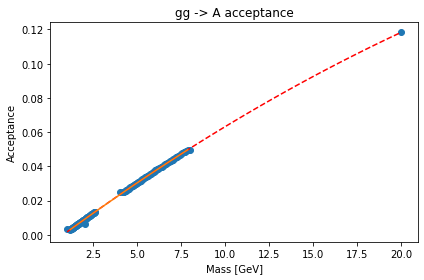

In [2]:
# ACCEPTANCE
mass = np.array([1., 2., 4., 5., 6., 7., 8., 20.])

#acc_amumu = np.array([0.0081, 0.0256, 0.0589, 0.0711, 0.0900, 0.1060, 0.1214, 0.3688])
# Inclusive gg2A3 (ptmumu20 for mass larger than 4 GeV and ptmumu35 for mass lower than 4 GeV)
acc_amumu = np.array([0.0032, 0.0062, 0.0253, 0.0306, 0.0382,0.0439, 0.0496, 0.1183])
# plusX modes (ptmumu20 for mass larger than 4 GeV and ptmumu35 for mass lower than 4 GeV)
#acc_amumu = np.array([0.0191, 0.0197, 0.0426, 0.0523, 0.0503, 0.0537, 0.0599, 0.0852])

p = polyfit(mass, acc_amumu, 2)
print(p)
x1 = linspace(1,20)
f1 = polyval(p,x1)
plt.plot(mass, acc_amumu, 'o')
plt.plot(x1,f1,'r--')
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Polynomial fit')
#plt.rcParams["figure.figsize"] = (10,6)
plt.tight_layout()
#plt.show()
plt.savefig('ggA_acceptanceHighStat_pol2_gg2A3.pdf', dpi=1200)
plt.savefig('ggA_acceptanceHighStat_pol2_gg2A3.png', dpi=1200)
#plt.savefig('ggA_acceptance_pol2_plusXmodes.pdf', dpi=1200)
#plt.savefig('ggA_acceptance_pol2_plusXmodes.png', dpi=1200)

f_acc_amumu = np.poly1d(p)
v_mass = np.array([1.176, 1.187, 1.199, 1.211, 1.223, 1.235, 1.248, 1.26, 1.273, 1.286, 1.299, 1.312, 1.325, 1.338, 1.351, 1.365, 1.378, 1.392, 1.406, 1.42, 1.434, 1.449, 1.463,
1.478, 1.493, 1.508, 1.523, 1.538, 1.553, 1.569, 1.584, 1.6, 1.616, 1.632, 1.649, 1.665, 1.682, 1.699, 1.716, 1.733, 1.75, 1.768, 1.785, 1.803, 1.821, 1.839,
1.858, 1.876, 1.895, 1.914, 1.933, 1.953, 1.972, 1.992, 2.012, 2.032, 2.052, 2.073, 2.094, 2.114, 2.136, 2.157, 2.179, 2.2, 2.222, 2.245, 2.267, 2.29, 2.313,
2.336, 2.359, 2.383, 2.406, 2.43, 2.455, 2.479, 2.504, 2.529, 2.554, 2.58, 2.5801, 4.2009, 4.201, 4.243, 4.286, 4.328, 4.372, 4.415, 4.46, 4.504, 4.549, 4.595, 4.641, 4.687,
4.734, 4.781, 4.829, 4.877, 4.926, 4.975, 5.025, 5.075, 5.126, 5.177, 5.229, 5.282, 5.334, 5.388, 5.442, 5.496, 5.551, 5.606, 5.663, 5.719, 5.776, 5.834, 5.892,
5.951, 6.011, 6.071, 6.132, 6.193, 6.255, 6.318, 6.381, 6.445, 6.509, 6.574, 6.64, 6.706, 6.773, 6.841, 6.909, 6.978, 7.048, 7.119, 7.19, 7.262, 7.334, 7.408,
7.482, 7.557, 7.632, 7.709, 7.786, 7.864])

v_acc_amumu = []
for i in range(len(v_mass)):
    v_acc_amumu.append(f_acc_amumu(v_mass[i]))

plt.scatter(v_mass, v_acc_amumu)
plt.plot(v_mass, v_acc_amumu)
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance')
plt.tight_layout()
#plt.show()
plt.savefig('ggA_newAcceptancesHighStat_gg2A3.pdf', dpi=1200)
plt.savefig('ggA_newAcceptancesHighStat_gg2A3.png', dpi=1200)
#plt.savefig('ggA_newAcceptances_plusXmodes.pdf', dpi=1200)
#plt.savefig('ggA_newAcceptances_plusXmodes.png', dpi=1200)

print("Mass points considered: \n", v_mass, '\n')
print("and corresponding acceptance values: \n", v_acc_amumu, '\n')

In [3]:
# BRANCHING RATIO

#br_amumu = np.array([0.021105, 0.026048, 0.002397, 0.002415, 0.001905, 0.001802, 0.001778, 0.001244])
v_br = []

f_br = np.loadtxt("./BR_IV_tgBeta05_allLimits.txt", delimiter = "\t")
#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_br)):
    v_br.append(round(f_br[i][1], 5))
print("Branching ratios: \n", v_br)

Branching ratios: 
 [0.02418, 0.02418, 0.02418, 0.02545, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02651, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02738, 0.02804, 0.02804, 0.02804, 0.02804, 0.02851, 0.02851, 0.02851, 0.02878, 0.02878, 0.02878, 0.02878, 0.02878, 0.02878, 0.02887, 0.02887, 0.02887, 0.02879, 0.02879, 0.02879, 0.02879, 0.02854, 0.02854, 0.02854, 0.02854, 0.02854, 0.02814, 0.02814, 0.02814, 0.02758, 0.02758, 0.02758, 0.02688, 0.02688, 0.02688, 0.02688, 0.02688, 0.02605, 0.02605, 0.02605, 0.02508, 0.02508, 0.02399, 0.02399, 0.02399, 0.02399, 0.02276, 0.02141, 0.02141, 0.02141, 0.02141, 0.01991, 0.01991, 0.01933, 0.01873, 0.01811, 0.01746, 0.0168, 0.01611, 0.01539, 0.01465, 0.01389, 0.01309, 0.01309, 0.00395, 0.00395, 0.00402, 0.00401, 0.00397, 0.00381, 0.00374, 0.00361, 0.00347, 0.0034, 0.00328, 0.0031, 0.00304, 0.00289, 0.00284, 0.0028, 0.00265, 0.00252, 0.00252, 0.00242, 0.00242, 0.00232, 0.00232, 0.00225, 0.00225, 0.00218, 0.00218, 0.00213, 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


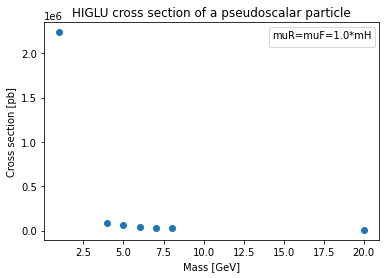

In [4]:
# CROSS SECTION
mass_xsec = np.array([1., 4., 5., 6., 7., 8., 20.])
# PSEUDOSCALAR, muR=muF=1*mH, PDF4LHC15_nlo_100
xsec_higlu_1 = np.array([2238290., 87947, 57976, 42971, 34378, 29217, 7152])

plt.scatter(mass_xsec, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
#plt.ylim(0., 3000000.)
plt.title("HIGLU cross section of a pseudoscalar particle")
plt.legend(loc='upper right', title="muR=muF=1.0*mH", fontsize='small')
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR1_muF1_pseudoscalar_PDF4LHC15_nlo_100.pdf', dpi=1200)
plt.savefig('xsec_muR1_muF1_pseudoscalar_PDF4LHC15_nlo_100.png', dpi=1200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


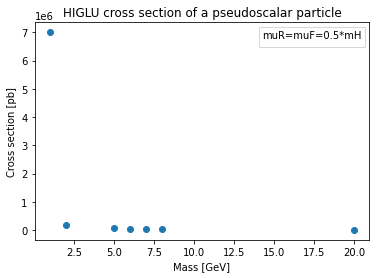

In [5]:
# CROSS SECTION
mass_xsec = np.array([1., 2., 5., 6., 7., 8., 20.])
# PSEUDOSCALAR, muR=muF=0.5*mH, PDF4LHC15_nlo_100
xsec_higlu_1 = np.array([7003490, 167761, 58508, 44667, 35576, 31510, 8086])

plt.scatter(mass_xsec, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a pseudoscalar particle")
plt.legend(loc='upper right', title="muR=muF=0.5*mH", fontsize='small')
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR0p5_muF0p5_pseudoscalar_PDF4LHC15_nlo_100.pdf', dpi=1200)
plt.savefig('xsec_muR0p5_muF0p5_pseudoscalar_PDF4LHC15_nlo_100.png', dpi=1200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


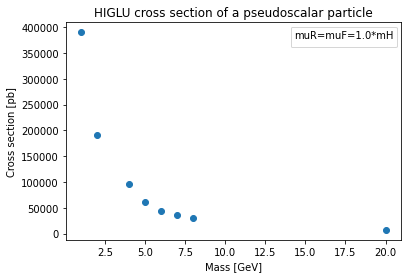

In [6]:
# CROSS SECTION
mass_xsec = np.array([1., 2., 4., 5., 6., 7., 8., 20.])
# PSEUDOSCALAR, muR=muF=1*mH, NNPDF30_nlo_as_0118
xsec_higlu_1 = np.array([390286, 190545, 95936, 61476, 44707, 35255, 29605, 7128])

plt.scatter(mass_xsec, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a pseudoscalar particle")
plt.legend(loc='upper right', title="muR=muF=1.0*mH", fontsize='small')
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR1_muF1_pseudoscalar_NNPDF30_nlo_as_0118.pdf', dpi=1200)
plt.savefig('xsec_muR1_muF1_pseudoscalar_NNPDF30_nlo_as_0118.png', dpi=1200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


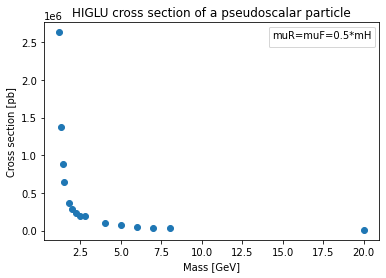

In [7]:
# CROSS SECTION => Chosen to be as much as possible aligned with LHCb choices
#mass_xsec = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.8, 2., 2.2, 2.5, 2.8, 4., 5., 6., 7., 8., 20.])
mass_xsec = np.array([1.2, 1.3, 1.4, 1.5, 1.8, 2., 2.2, 2.5, 2.8, 4., 5., 6., 7., 8., 20.])

# PSEUDOSCALAR, muR=muF=0.5*mH, NNPDF30_nlo_as_0118
#xsec_higlu_1 = np.array([7910740, 2631990, 1372070, 881140, 642097, 365239, 283080, 237671, 199051, 195270, 101029, 66799, 49249, 39060, 32812, 8062])
xsec_higlu_1 = np.array([2631990, 1372070, 881140, 642097, 365239, 283080, 237671, 199051, 195270, 101029, 66799, 49249, 39060, 32812, 8062])

plt.scatter(mass_xsec, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
#plt.ylim(0., 3000000.)
plt.title("HIGLU cross section of a pseudoscalar particle")
plt.legend(loc='upper right', title="muR=muF=0.5*mH", fontsize='small')
#plt.tight_layout()
#plt.show()
plt.savefig('xsec_muR0p5_muF0p5_pseudoscalar_NNPDF30_nlo_as_0118.pdf', dpi=1200)
plt.savefig('xsec_muR0p5_muF0p5_pseudoscalar_NNPDF30_nlo_as_0118.png', dpi=1200)

In [8]:
# Extract all xsec values from the txt file: obtained with a spline

v_xsec = []

f_xsec = np.loadtxt("./higlu_pseudoscalar_xsec_fit_muR05_muF05.txt", delimiter = "\t")
#print("shape of data:", f_xsec.shape)
#print("datatype of data:", f_xsec.dtype)
#print("First 5 rows:\n", f_xsec[:5])

for nx in range(len(f_xsec)):
    # 1: values using linear fit in TGraph; 2: values using spline
    v_xsec.append(f_xsec[nx][1])
    
print("xsec_fit: \n", v_xsec)

xsec_fit: 
 [3383220.0, 3006680.0, 2658290.0, 2368340.0, 2129990.0, 1936410.0, 1769280.0, 1647010.0, 1541050.0, 1454200.0, 1377770.0, 1304270.0, 1232400.0, 1162790.0, 1096050.0, 1028110.0, 969336.0, 911430.0, 859849.0, 814678.0, 775188.0, 738297.0, 708101.0, 679381.0, 653485.0, 629478.0, 606876.0, 585602.0, 565597.0, 545588.0, 528013.0, 510459.0, 494065.0, 478757.0, 463602.0, 450305.0, 437120.0, 424821.0, 413321.0, 402532.0, 392366.0, 382183.0, 373024.0, 363710.0, 354718.0, 346042.0, 337231.0, 329215.0, 321108.0, 313370.0, 306006.0, 298662.0, 292077.0, 285564.0, 279483.0, 273816.0, 268528.0, 263343.0, 258495.0, 254153.0, 249642.0, 245554.0, 241454.0, 237671.0, 233809.0, 229887.0, 226262.0, 222618.0, 219140.0, 215845.0, 212747.0, 209744.0, 207102.0, 204610.0, 202320.0, 200434.0, 198817.0, 197556.0, 196616.0, 195931.0, 195928.0, 88277.4, 88272.1, 86159.4, 84170.2, 82386.3, 80674.9, 79146.7, 77688.1, 76389.0, 75177.9, 74049.7, 73018.9, 72071.9, 71176.9, 70340.9, 69532.9, 68755.8, 67978.5,

In [9]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
v_exp_limit = []

# Reference results: noPtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_expectedLimit_noPtMuMuCut_20220401.txt", delimiter = "\t")

# Updated Trigger Efficiency: observed and expected results WITH PtMuMu cut
f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_obsLimit_newTreff_PtCut_20220712.txt", delimiter = "\t")
f_exp_limit = np.loadtxt("./CMS_modelIndependentLimits_expLimit_newTreff_PtCut_20220712.txt", delimiter = "\t")

# Updated Trigger Efficiency: observed and expected results WITHOUT PtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_obsLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")
#f_exp_limit = np.loadtxt("./CMS_modelIndependentLimits_expLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")

#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_obs_limit.append(round(f_obs_limit[i][1], 5))
    v_exp_limit.append(round(f_exp_limit[i][1], 5))
print("Model independent observed limits: \n", v_obs_limit)
print("##################################################")
print("Model independent expected limits: \n", v_exp_limit)

Model independent observed limits: 
 [0.01133, 0.01457, 0.00929, 0.01109, 0.02504, 0.01963, 0.01611, 0.00966, 0.00823, 0.01624, 0.02346, 0.01394, 0.01087, 0.00959, 0.01359, 0.02275, 0.01313, 0.0093, 0.00983, 0.01293, 0.01518, 0.02073, 0.02213, 0.01103, 0.00803, 0.00949, 0.0118, 0.01433, 0.01373, 0.01762, 0.01657, 0.01148, 0.01521, 0.01021, 0.0105, 0.01326, 0.01173, 0.00898, 0.01363, 0.02005, 0.02362, 0.02051, 0.01128, 0.00897, 0.00578, 0.00742, 0.02385, 0.02682, 0.01891, 0.01328, 0.01042, 0.00798, 0.00747, 0.0154, 0.0225, 0.01502, 0.01272, 0.01092, 0.00747, 0.01411, 0.02239, 0.00885, 0.00847, 0.00795, 0.00917, 0.02836, 0.02997, 0.01013, 0.00534, 0.00498, 0.00781, 0.01775, 0.03552, 0.027, 0.00837, 0.00459, 0.00667, 0.01306, 0.02415, 0.02552, 999999.0, 999999.0, 0.04576, 0.03099, 0.02736, 0.03045, 0.03021, 0.0469, 0.03933, 0.03316, 0.03209, 0.02451, 0.03177, 0.04061, 0.03852, 0.01959, 0.01931, 0.02817, 0.05117, 0.06226, 0.04684, 0.02146, 0.01645, 0.01575, 0.02581, 0.04697, 0.0624, 0.0439

In [10]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("obs lim: ", len(v_exp_limit))
print("xsec: ", len(v_xsec))
print("br: ", len(v_br))
print("acc: ", len(v_acc_amumu))

mass:  146
obs lim:  146
obs lim:  146
xsec:  146
br:  146
acc:  146


In [11]:
# SinTheta OBS LIMITS

senTheta_obs_limit = []
for l in range(len(f_obs_limit)):  
    senTheta_obs = math.sqrt(v_obs_limit[l] / (v_xsec[l] * v_br[l] * v_acc_amumu[l]))
    senTheta_obs_limit.append(round(senTheta_obs,5))
print("### OBS ###")
senTheta_obs_limit

### OBS ###


[0.00667,
 0.00792,
 0.00663,
 0.00739,
 0.01132,
 0.01038,
 0.0097,
 0.00769,
 0.00725,
 0.01035,
 0.01263,
 0.00973,
 0.00874,
 0.00835,
 0.01013,
 0.01338,
 0.01036,
 0.00889,
 0.0092,
 0.01072,
 0.01179,
 0.01396,
 0.01446,
 0.01031,
 0.00888,
 0.00969,
 0.0109,
 0.01211,
 0.01195,
 0.01365,
 0.01333,
 0.01116,
 0.01294,
 0.01067,
 0.01091,
 0.01233,
 0.01166,
 0.01025,
 0.01275,
 0.01553,
 0.01693,
 0.01584,
 0.0118,
 0.01064,
 0.00857,
 0.00975,
 0.01774,
 0.01888,
 0.01592,
 0.01357,
 0.01207,
 0.0106,
 0.01029,
 0.01482,
 0.01825,
 0.01495,
 0.01378,
 0.01304,
 0.0108,
 0.01519,
 0.01916,
 0.01205,
 0.0118,
 0.01175,
 0.01302,
 0.02291,
 0.02356,
 0.01371,
 0.01033,
 0.00998,
 0.01268,
 0.01942,
 0.02792,
 0.02476,
 0.01403,
 0.01059,
 0.01302,
 0.0186,
 0.02586,
 0.02724,
 170.48355,
 338.93967,
 0.07251,
 0.05952,
 0.05632,
 0.06001,
 0.06129,
 0.07738,
 0.07237,
 0.06796,
 0.0677,
 0.06034,
 0.07075,
 0.08085,
 0.0808,
 0.05814,
 0.05814,
 0.07218,
 0.09977,
 0.11006,
 0.097

In [12]:
# SinTheta EXP LIMITS

senTheta_exp_limit = []
for l in range(len(f_exp_limit)):  
    senTheta_exp = math.sqrt(v_exp_limit[l] / (v_xsec[l] * v_br[l] * v_acc_amumu[l]))
    senTheta_exp_limit.append(round(senTheta_exp,5))
print("### EXP ###")
senTheta_exp_limit

### EXP ###


[0.00725,
 0.00759,
 0.00796,
 0.00811,
 0.00827,
 0.0086,
 0.00888,
 0.00909,
 0.00928,
 0.00943,
 0.00957,
 0.00957,
 0.00973,
 0.0099,
 0.01005,
 0.01026,
 0.01045,
 0.01066,
 0.01073,
 0.01091,
 0.01102,
 0.01113,
 0.01116,
 0.01128,
 0.01138,
 0.01139,
 0.01148,
 0.01153,
 0.01162,
 0.01172,
 0.0118,
 0.01187,
 0.01191,
 0.01194,
 0.01204,
 0.01211,
 0.01217,
 0.01224,
 0.01235,
 0.01241,
 0.01246,
 0.01251,
 0.01256,
 0.01266,
 0.01271,
 0.01276,
 0.01294,
 0.01294,
 0.013,
 0.01322,
 0.01327,
 0.01332,
 0.01336,
 0.01341,
 0.01349,
 0.01353,
 0.0135,
 0.01379,
 0.01375,
 0.01413,
 0.01415,
 0.0141,
 0.01405,
 0.01444,
 0.01489,
 0.01491,
 0.0148,
 0.01481,
 0.01536,
 0.01537,
 0.0156,
 0.01571,
 0.01732,
 0.01624,
 0.01653,
 0.01677,
 0.01711,
 0.0174,
 0.01779,
 0.01823,
 170.48355,
 338.93967,
 0.06204,
 0.0617,
 0.06195,
 0.06248,
 0.06397,
 0.06453,
 0.06571,
 0.0669,
 0.06732,
 0.06835,
 0.06995,
 0.07059,
 0.07209,
 0.07251,
 0.0728,
 0.07459,
 0.07636,
 0.07625,
 0.07759,

In [13]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("obs lim: ", len(v_exp_limit))
print("xsec: ", len(v_xsec))
print("br: ", len(v_br))
print("acc: ", len(v_acc_amumu))
print("senTheta_obs: ", len(senTheta_obs_limit))
print("senTheta_obs: ", len(senTheta_exp_limit))

mass:  146
obs lim:  146
obs lim:  146
xsec:  146
br:  146
acc:  146
senTheta_obs:  146
senTheta_obs:  146


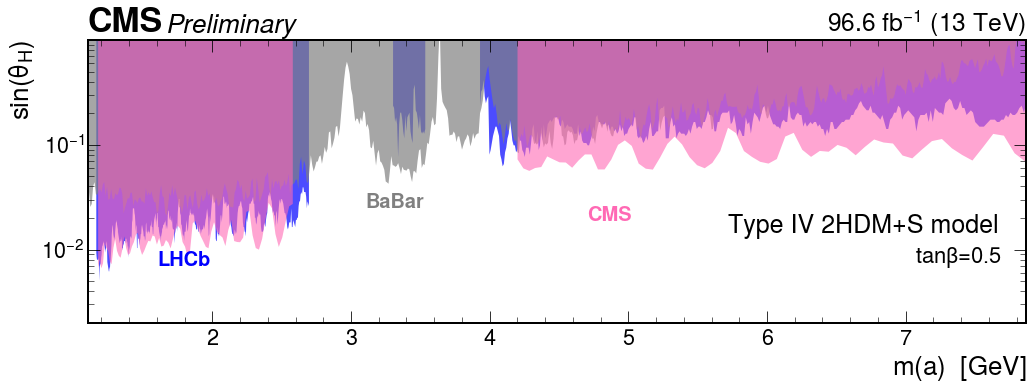

In [24]:
#hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
hep.style.use("CMS") # string aliases work too

f_LHCb = np.loadtxt("./LHCb_limits.txt", delimiter = " ")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1])

v_lim_BaBar = []
v_mass_BaBar = []
f_BaBar = np.loadtxt("./BaBar_limits.txt", delimiter = " ")
v_mass_BaBar = []
for i in range(len(f_BaBar)):
    v_mass_BaBar.append(f_BaBar[i][0])
    v_lim_BaBar.append(f_BaBar[i][1])

p_cms_obs, p_lhcb = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 19})
#range = np.array([2.696,3.303])

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, lumi=96.6)
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

# Just experiment label and <text> such as 'Preliminary' or 'Simulation'
#hep.CMS.text(<text>)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.7)
p_lhcb = plt.ylim(0.002, 0.9999)
p_lhcb = plt.semilogy()
p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.7)
#p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="lightseagreen", linewidth=0)
#p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="lightseagreen", linewidth=0, alpha=0.6)
p_cms_obs = plt.plot(v_mass, senTheta_obs_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, senTheta_obs_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,7.87)
plt.xlabel(r'm$(a)$  [GeV]')
plt.ylabel('sin($\\theta_{H}$)')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_cms_obs = plt.text(4.7, 0.019, "CMS", fontsize=20, color="hotpink", fontweight='bold')
p_lhcb = plt.text(1.6, 0.007, "LHCb", fontsize=20, color="blue", fontweight='bold')
#p_lhcb = plt.text(1.6, 0.007, "LHCb", fontsize=20, color="mediumslateblue", fontweight='bold')
p_babar = plt.text(3.1, 0.025, "BaBar", fontsize=20, color="grey", fontweight='bold')
#p_babar = plt.text(3.1, 0.025, "BaBar", fontsize=20, color="lightseagreen", fontweight='bold')

#plt.text(5.7, 0.015, "2HDM+S (type IV) model, tan$\\beta$=0.5", fontsize=22, verticalalignment='top')
plt.text(5.72, 0.022, "Type IV 2HDM+S model", fontsize=25, verticalalignment='top')
plt.text(7.07, 0.011, "tan$\\beta$=0.5", fontsize=22, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptancesHighStat_PtMuMuCut_gg2A3_OBS.pdf', dpi=1200)
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptancesHighStat_PtMuMuCut_gg2A3_OBS.png', dpi=1200)
#plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptances_PtMuMuCut_plusXmodes_OBS.pdf', dpi=1200)
#plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptances_PtMuMuCut_plusXmodes_OBS.png', dpi=1200)

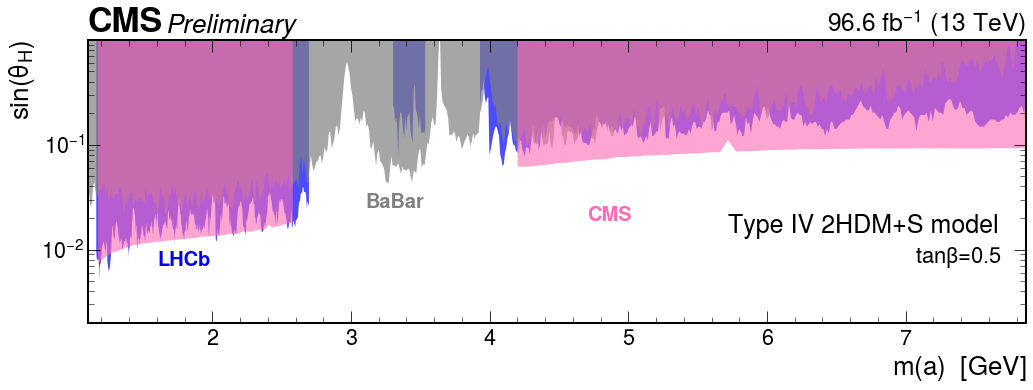

In [25]:
f_LHCb = np.loadtxt("./LHCb_limits.txt", delimiter = " ")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1])

p_cms_obs, p_lhcb = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 19})
#range = np.array([2.696,3.303])

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, lumi=96.6)
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

# Just experiment label and <text> such as 'Preliminary' or 'Simulation'
#hep.CMS.text(<text>)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.7)
p_lhcb = plt.ylim(0.002, 0.999)
p_lhcb = plt.semilogy()
p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.7)
#p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="lightseagreen", linewidth=0)
#p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="lightseagreen", linewidth=0, alpha=0.6)
p_cms_exp = plt.plot(v_mass, senTheta_exp_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, senTheta_exp_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,7.87)
plt.xlabel(r'm$(a)$  [GeV]')
plt.ylabel('sin($\\theta_{H}$)')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_cms_obs = plt.text(4.7, 0.019, "CMS", fontsize=20, color="hotpink", fontweight='bold')
p_lhcb = plt.text(1.6, 0.007, "LHCb", fontsize=20, color="blue", fontweight='bold')
#p_lhcb = plt.text(1.6, 0.007, "LHCb", fontsize=20, color="mediumslateblue", fontweight='bold')
p_babar = plt.text(3.1, 0.025, "BaBar", fontsize=20, color="grey", fontweight='bold')
#p_babar = plt.text(3.1, 0.025, "BaBar", fontsize=20, color="lightseagreen", fontweight='bold')

#plt.text(5.7, 0.015, "2HDM+S (type IV) model, tan$\\beta$=0.5", fontsize=22, verticalalignment='top')
plt.text(5.72, 0.022, "Type IV 2HDM+S model", fontsize=25, verticalalignment='top')
plt.text(7.07, 0.011, "tan$\\beta$=0.5", fontsize=22, verticalalignment='top')

#plt.show()
plt.tight_layout()
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptancesHighStat_PtMuMuCut_gg2A3_EXP.pdf', dpi=1200)
plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptancesHighStat_PtMuMuCut_gg2A3_EXP.png', dpi=1200)
#plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptances_PtMuMuCut_plusXmodes_EXP.pdf', dpi=1200)
#plt.savefig('senTheta_CMS_LHCb_newCmsAcceptances_newTriggerAcceptances_PtMuMuCut_plusXmodes_EXP.png', dpi=1200)